In [2]:
import sqlite3
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr 
pd.set_option('max_colwidth', 400)


In [3]:
def format_time(num_time: float, format_str: str) -> str:
    units = {
        "s": lambda x: f"{num_time:.2f} s",
        "ms": format_milli,
        "us": lambda x: f"{num_time:.2f} us",
        "ns": format_nano
    }
    for unit in ['s', 'ms', 'us', 'ns']:
        if format_str == unit:
            return units[unit](num_time)

def format_milli(num_time: float) -> str:
    if num_time < 1000:
        return f"{num_time:.2f} ms"
    else:
        return f"{num_time / 1000:.3f} s"

def format_nano(num_time: float) -> str:
    if num_time < 1000:
        return f"{num_time:.2f} ns"
    elif num_time < 1_000_000:
        return f"{num_time / 1000:.2f} μs"
    elif num_time < 1_000_000_000:
        return f"{num_time / 1000000:.2f} ms"
    else:
        return f"{num_time / 1000000000:.2f} s"

In [34]:
root = './duui_parallel_benchmarks/'
samples = f'{root}samples/'
size = 1000
variant = "smallest" # largest random
skip_size_smaller_than = "1MB"
gerparcor_sample = f'./samples/gerparcor_{variant}_{size}_{skip_size_smaller_than}'
print(gerparcor_sample + ".db")
con = sqlite3.connect(f'{gerparcor_sample}.db')
cur = con.cursor()
run_keys = [name[0] for name in cur.execute('SELECT name FROM pipeline')]
perfs = [(perf[0], format_time(perf[2] - perf[1], "ms")) for perf in cur.execute('SELECT * FROM pipeline_perf')]
print(run_keys)

for perf in perfs:
    print(perf)

# config = pd.read_sql_query("SELECT * FROM host_config GROUP BY name", con)
# # cpu = pd.read_sql_query("SELECT name, AVG(host_cpu_load), AVG(jvm_cpu_load) FROM cpu_usage GROUP BY name", con)
# cpu = pd.read_sql_query("SELECT name, host_cpu_load, jvm_cpu_load FROM cpu_usage WHERE name='gerparcor_smallest_40_1MB_pool_2_cas_2_width_4_scaled_'", con)

# memory = pd.read_sql_query("SELECT name, host_memory_usage, jvm_memory_usage FROM memory_usage", con)
# # threads = pd.read_sql_query("SELECT name, waited_time, cpu_time, blocked_time FROM thread_stats WHERE thread_name<>'main' AND thread_name<>'DUUIResourceManager'", con)
# threads = pd.read_sql_query("SELECT name, thread_name, waited_time, cpu_time, blocked_time FROM thread_stats WHERE name='gerparcor_smallest_40_1MB_pool_2_cas_2_width_4_scaled_' AND thread_name<>'main' AND thread_name<>'DUUIResourceManager'", con)




./samples/gerparcor_smallest_1000_1MB.db
['gerparcor_smallest_1000_1MB_pool_10_old_', 'gerparcor_smallest_1000_1MB_pool_10_semiparallel', 'gerparcor_smallest_1000_1MB_pool_10_width_1_scaled', 'gerparcor_smallest_1000_1MB_pool_10_width_1_scaled_kill', 'gerparcor_smallest_1000_1MB_pool_10_width_1_unscaled', 'gerparcor_smallest_1000_1MB_pool_10_width_4_scaled', 'gerparcor_smallest_1000_1MB_pool_10_width_4_scaled_kill', 'gerparcor_smallest_1000_1MB_pool_10_width_4_unscaled', 'gerparcor_smallest_1000_1MB_pool_15_old_', 'gerparcor_smallest_1000_1MB_pool_15_semiparallel', 'gerparcor_smallest_1000_1MB_pool_15_width_1_scaled', 'gerparcor_smallest_1000_1MB_pool_15_width_1_scaled_kill', 'gerparcor_smallest_1000_1MB_pool_15_width_1_unscaled', 'gerparcor_smallest_1000_1MB_pool_15_width_4_scaled', 'gerparcor_smallest_1000_1MB_pool_15_width_4_unscaled', 'gerparcor_smallest_1000_1MB_pool_1_old_', 'gerparcor_smallest_1000_1MB_pool_1_repl_5_old_', 'gerparcor_smallest_1000_1MB_pool_1_semiparallel', 'gerp

<Axes: xlabel='timestamp'>

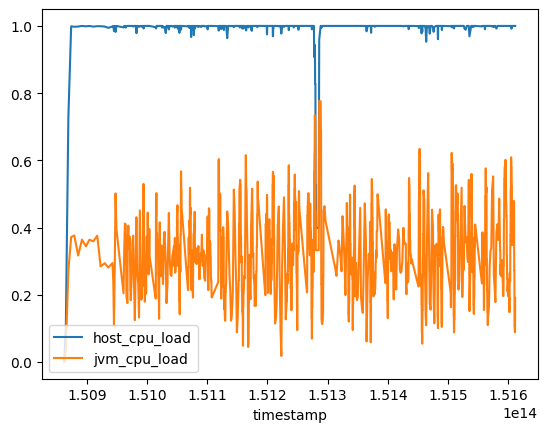

In [32]:
cpu = pd.read_sql_query("SELECT name, timestamp, host_cpu_load, jvm_cpu_load FROM cpu_usage WHERE name='gerparcor_smallest_1000_1MB_pool_15_width_1_scaled_kill'", con)

cpu.plot.line(x="timestamp")

In [93]:
run_keys

['gerparcor_smallest_40_1MB_pool_1_cas_1_semiparallel_',
 'gerparcor_smallest_40_1MB_pool_2_cas_2_semiparallel_',
 'gerparcor_smallest_40_1MB_pool_2_cas_2_width_4_scaled_',
 'gerparcor_smallest_40_1MB_pool_3_cas_2_semiparallel_',
 'gerparcor_smallest_40_1MB_pool_3_cas_2_width_2_scaled_',
 'gerparcor_smallest_40_1MB_pool_3_cas_2_width_4_scaled_',
 'gerparcor_smallest_40_1MB_pool_4_cas_2_semiparallel_',
 'gerparcor_smallest_40_1MB_pool_4_cas_2_width_2_scaled_',
 'gerparcor_smallest_40_1MB_pool_4_cas_2_width_4_scaled_']

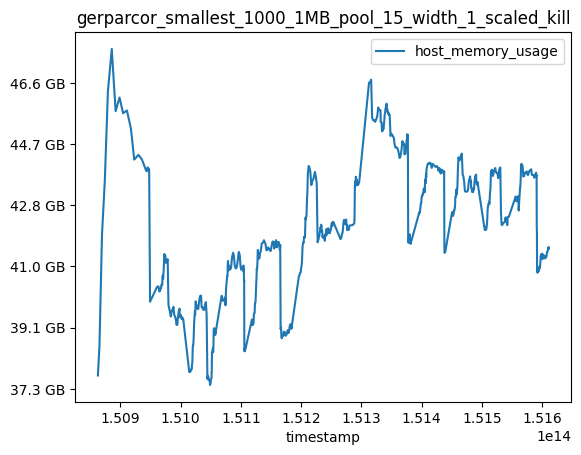

In [29]:
def sizeof_fmt(x, pos):
    if x<0:
        return ""
    for x_unit in ['bytes', 'kB', 'MB', 'GB', 'TB']:
        if x < 1024.0:
            return "%3.1f %s" % (x, x_unit)
        x /= 1024.0

def query(name: str):
    return f"SELECT name, timestamp, host_memory_usage FROM memory_usage WHERE name='{name}'"

# memory_stats = [pd.read_sql_query(query(run), con) for run in run_keys]

# for name in run_keys:
memory = pd.read_sql_query(query('gerparcor_smallest_1000_1MB_pool_15_width_1_scaled_kill'), con)    
plot = memory.plot.line(x="timestamp", y="host_memory_usage", title='gerparcor_smallest_1000_1MB_pool_15_width_1_scaled_kill')
plot.yaxis.set_major_formatter(tkr.FuncFormatter(sizeof_fmt))

In [ ]:
cur.close()
con.close()